In [1]:
!pip install -q datasets tqdm

In [2]:
from datasets import load_dataset
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
HF_DATASET_PATH = "sdelowar2/product-reviews-pros-cons"
DATASET_SPLIT = "train"

In [4]:
# Step 4: Load dataset from Hugging Face Hub
print("🚀 Loading dataset from Hugging Face Hub...")
dataset = load_dataset(HF_DATASET_PATH, split=DATASET_SPLIT)
print(f"✅ Loaded {len(dataset)} examples")

🚀 Loading dataset from Hugging Face Hub...


README.md:   0%|          | 0.00/351 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/8.22M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3000 [00:00<?, ? examples/s]

✅ Loaded 3000 examples


In [5]:
!pip install tiktoken -q

In [6]:
import tiktoken

enc = tiktoken.get_encoding("cl100k_base")

In [7]:
# Utils

# Format as chat message
def format_as_messages(example: dict) -> dict:
    """Convert a dataset example into a structured chat format."""

    review_text = "\n".join([f"- {r}" for r in example["input"]])
    user_prompt = f"Instruction: {example['instruction']}\nReviews:\n{review_text}"
    return {
        "messages": [
            {"role": "system", "content": "You are an assistant that extracts pros and cons from product reviews."},
            {"role": "user", "content": user_prompt},
            {"role": "assistant", "content": example["answer"]}
        ]
    }



# Count tokens in messages
def get_token_counts(ds_formatted_messages):

  messages_tokens_count = []

  for sample in ds_formatted_messages:
    messages = sample["messages"]
    tokens_count = len(enc.encode(str(messages)))
    messages_tokens_count.append(tokens_count)

  return messages_tokens_count

In [11]:
# Util for plotting his and box plots

def plot_counts(count_list, title_hist, x_label_hist, y_label_hist, title_box, x_label_box):
  # Create subplots side by side
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

  # Histogram on the left
  ax1.hist(count_list, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
  ax1.set_title(title_hist)
  ax1.set_xlabel(x_label_hist)
  ax1.set_ylabel(y_label_hist)
  ax1.grid(True, alpha=0.3)

  # Box plot on the right
  sns.boxplot(x=count_list, ax=ax2)
  ax2.set_title(title_box)
  ax2.set_xlabel(x_label_box)

  # Adjust layout to prevent overlap
  plt.tight_layout()

  # Show both plots
  plt.show()

## Words and Tokens in Single Review

In [9]:
single_review_total_words = []
single_review_total_tokens = []

for sample in dataset:
  review_list = sample["input"]

  for review in review_list:
      words_count = len(review.split())
      tokens_count = len(enc.encode(review))
      single_review_total_words.append(words_count)
      single_review_total_tokens.append(tokens_count)

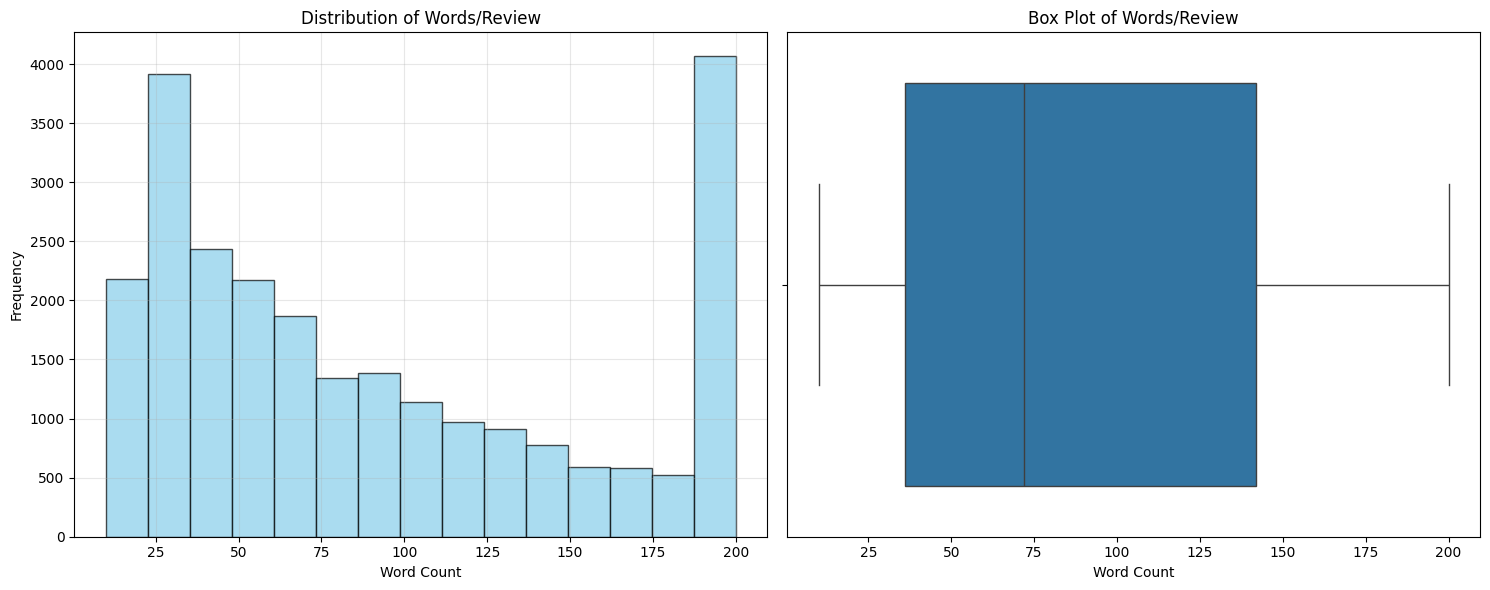

In [12]:
# Ploting the distribution of words per review
plot_counts(single_review_total_words,
            title_hist= "Distribution of Words/Review",
            x_label_hist="Word Count"
            , y_label_hist="Frequency",
            title_box="Box Plot of Words/Review",
            x_label_box="Word Count")

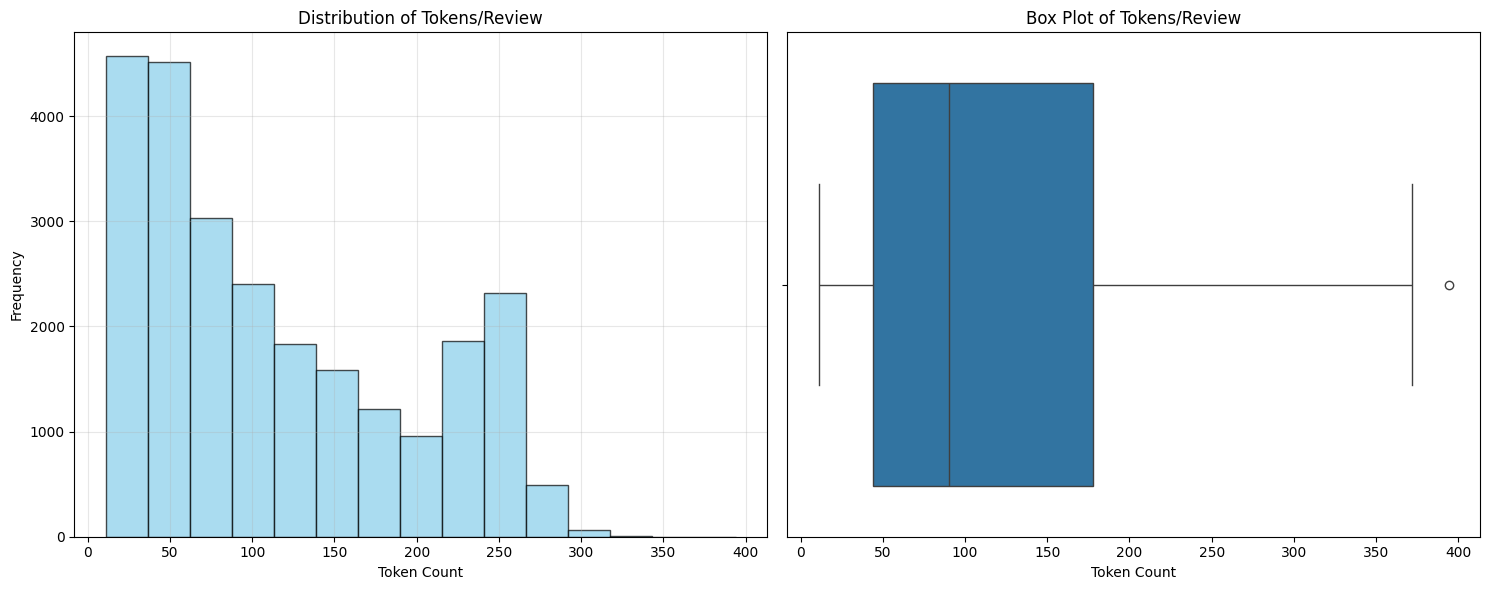

In [20]:
# Ploting the distribution of tokens per review
plot_counts(single_review_total_tokens,
            title_hist= "Distribution of Tokens/Review",
            x_label_hist="Token Count"
            , y_label_hist="Frequency",
            title_box="Box Plot of Tokens/Review",
            x_label_box="Token Count")

In [14]:
len(single_review_total_tokens)

24852

## Token Distribution in prompt (Chat_template) in the Dataset

In [15]:
ds_formatted_messages = dataset.map(format_as_messages)

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [17]:
ds_formatted_messages[0]

{'instruction': 'Generate pros and cons from the following product reviews.',
 'input': ['I am using this with a Nook HD+. It works as described. The HD picture on my Samsung 52&#34; TV is excellent.',
  'The cable is very wobbly and sometimes disconnects itself.The price is completely unfair and only works with the Nook HD and HD+',
  "This adaptor is real easy to setup and use right out of the box. I had not problem with it at all, it is well worth the purchase. I recommend this adaptor very much for viewing your Nook videos on your HDTV. I just disagree with other reviews on the length of the adaptor, I found it to be fairly adequate as to how and where it is connected to my TV. For me it was just right not too long or too short, I was able to place my Nook right below the connection on the TV stand, it did not fall or anything else, it is fine. Use your own judgement, I'm too busy watching my movies :)",
  'This adapter easily connects my Nook HD 7&#34; to my HDTV through the HDMI 

In [18]:
prompts_token_counts = get_token_counts(ds_formatted_messages)

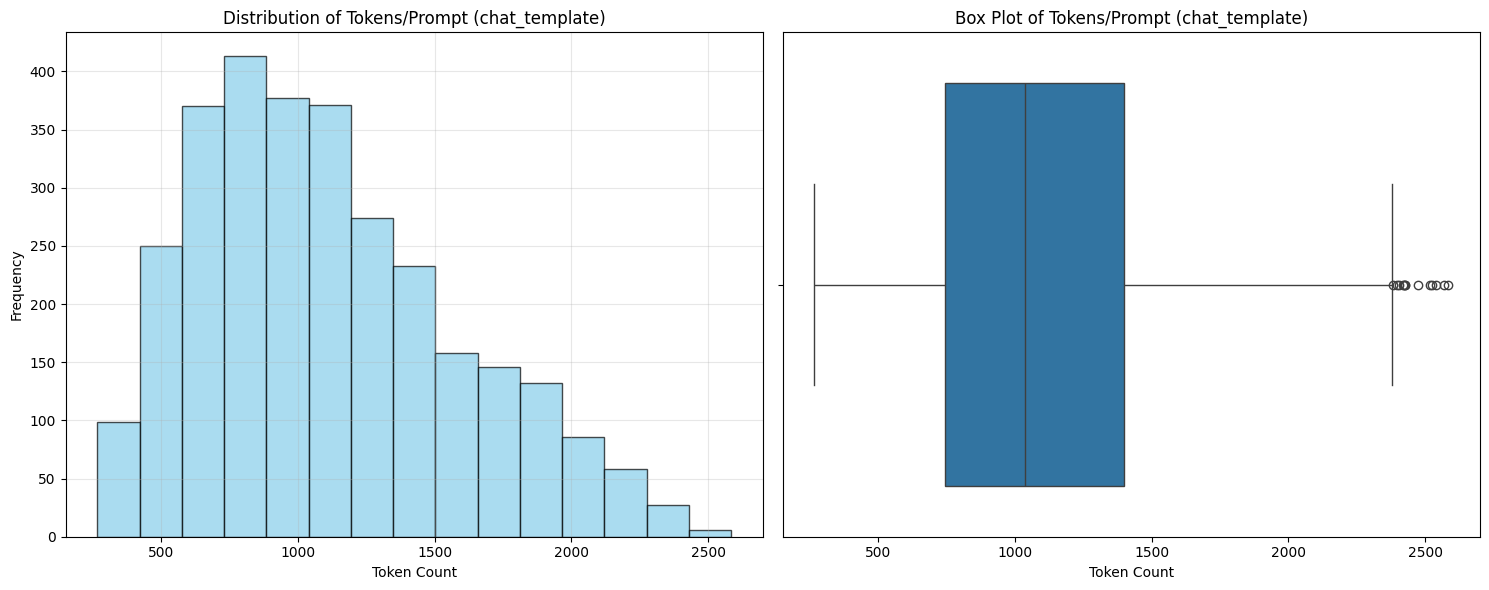

In [22]:
# Ploting the distribution of tokens per input Prompt
plot_counts(prompts_token_counts,
            title_hist= "Distribution of Tokens/Prompt (chat_template)",
            x_label_hist="Token Count"
            , y_label_hist="Frequency",
            title_box="Box Plot of Tokens/Prompt (chat_template)",
            x_label_box="Token Count")

In [ ]:
max(prompts_token_counts)